In [106]:
import pandas as pd
pd.set_option('display.max_colwidth', 0)

Imagine you have an email inbox, and every day you receive numerous messages. Among those messages, some are relevant and important, like messages from friends, family, or work-related contacts. However, you also receive unwanted messages that try to sell you something, promote scams, or contain irrelevant content.

Spam detection is like having a virtual assistant that helps you automatically distinguish between these two types of messages. It looks at various characteristics of the messages, such as the sender's information, the content of the message, and any attached links or files. Based on these characteristics, the spam detection system uses clever algorithms to make a prediction: Is this message likely to be spam or not?

The system uses patterns and rules it has learned from analyzing a large dataset of known spam and non-spam messages. It looks for clues or red flags that suggest a message might be spam, such as suspicious sender addresses, unusual content, or common phrases used in spam messages.

By using sophisticated algorithms and machine learning techniques, the spam detection system can become quite accurate over time. It continuously learns from new examples and adjusts its rules and patterns to adapt to evolving spam techniques.

The ultimate goal of spam detection is to protect you from unwanted messages, save your time and effort, and ensure that you only receive relevant and important communication. It acts as a filter, keeping your inbox clean and ensuring that you don't fall victim to scams or waste time dealing with irrelevant messages.

In [222]:
# Download from https://www.kaggle.com/datasets/uciml/sms-spam-collection-dataset 
df=pd.read_csv('data/spam.csv',encoding='latin-1')

#dropping un necessary columns
df = df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'])

df.drop_duplicates(keep='first',inplace=True)

df["v1"] = df["v1"].apply(lambda x: 1 if x=="spam" else 0)

#renaming the columns
df = df.rename(columns={'v1':'is_spam','v2':'text'})

In [221]:
df[["text","is_spam"]].sample(5).to_csv(index=None)

'text,is_spam\nWell thats nice. Too bad i cant eat it,0\n"Hmph. Go head, big baller.",0\n"The guy (kadeem) hasn\'t been selling since the break, I know one other guy but he\'s paranoid as fuck and doesn\'t like selling without me there and I can\'t be up there til late tonight",0\nTmr then Ì_ brin lar... Aiya later i come n c lar... Mayb Ì_ neva set properly Ì_ got da help sheet wif Ì_...,0\n"Thank you so much. When we skyped wit kz and sura, we didnt get the pleasure of your company. Hope you are good. We\'ve given you ultimatum oh! We are countin down to aburo. Enjoy! This is the message i sent days ago",0\n'

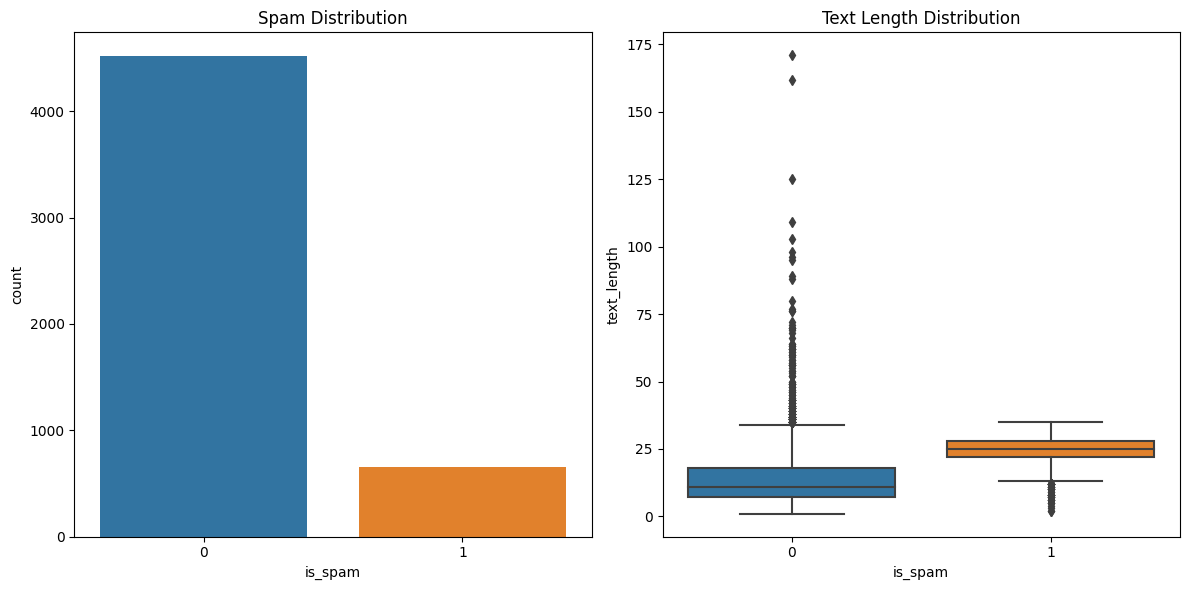

In [121]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have already loaded the DataFrame as 'df'

# Create a subplot with 1 row and 2 columns
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Plot the distribution of 'is_spam' on the first subplot
sns.countplot(data=df, x='is_spam', ax=axes[0])
axes[0].set_title('Spam Distribution')

# Calculate text lengths in words
df['text_length'] = df['text'].apply(lambda x: len(x.split()))

# Plot the distribution of text lengths with hue=is_spam using a boxplot on the second subplot
sns.boxplot(data=df, x='is_spam', y='text_length', ax=axes[1])
axes[1].set_title('Text Length Distribution')

# Adjust the spacing between subplots
plt.tight_layout()

# Display the combined plot
plt.show()


In [122]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import string

# Function to transform the text
def transform_text(text):
    # Convert text to lowercase
    text = text.lower()
    
    # Tokenize the text into individual words
    text = nltk.word_tokenize(text)
    
    # Create an empty list to store filtered words
    filtered_words = []
    
    # Iterate over each word in the text
    for word in text:
        # Check if the word contains only alphanumeric characters
        if word.isalnum():
            # Add the word to the filtered list
            filtered_words.append(word)
    
    # Update the text with the filtered words
    text = filtered_words[:]
    
    # Clear the filtered words list for reuse
    filtered_words.clear()
    
    # Remove stop words and punctuation from the text
    for word in text:
        # Check if the word is not a stop word or punctuation mark
        if word not in stopwords.words('english') and word not in string.punctuation:
            # Add the word to the filtered list
            filtered_words.append(word)
            
    # Update the text with the filtered words
    text = filtered_words[:]
    
    # Clear the filtered words list for reuse
    filtered_words.clear()
    
    # Apply stemming to the words in the text
    stemmer = PorterStemmer()
    for word in text:
        # Perform stemming on each word
        stemmed_word = stemmer.stem(word)
        # Add the stemmed word to the filtered list
        filtered_words.append(stemmed_word)
    
    # Join the filtered words to form the transformed text
    transformed_text = " ".join(filtered_words)
    
    # Return the transformed text
    return transformed_text
# Create a new column in the dataframe to store the transformed text
df['transformed_text'] = df['text'].apply(transform_text)

In [127]:
#we are taking most frequent 5000 words from the vocabulary 
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()

# Transform the text data into a numerical representation using CountVectorizer 
#and convert it into a 2D array 
X = cv.fit_transform(df['transformed_text']).toarray()

In [139]:
X.shape

(5169, 6708)

In [129]:
# Extract the values from the 'target' column of the DataFrame and store them in variable 'y'
y = df['is_spam'].values

In [130]:
from sklearn.model_selection import train_test_split

In [131]:
# Splitting the data into training and testing sets
# X represents the input features and y represents the target variable
# The data is split into a training set and a testing set
# The testing set size is set to 20% of the entire dataset
# The random_state parameter is set to 2 to ensure reproducibility of the split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [141]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

## Create a Gaussian Naive Bayes classifier

In [143]:
gnb = GaussianNB()

gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.8800773694390716
[[792 104]
 [ 20 118]]
0.5315315315315315


## Create a Multinomial Naive Bayes classifier

In [149]:
## Someone has already write the code that makes all of this.
mnb = MultinomialNB()

## 1. Training
mnb.fit(X_train,y_train)
## 2. Predicting
y_pred = mnb.predict(X_test)
## 3. Evaluate
precision = precision_score(y_test,y_pred)

0.8344370860927153

## Create a Bernoulli Naive Bayes classifier

In [147]:
bnb = BernoulliNB()

bnb.fit(X_train,y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9700193423597679
[[893   3]
 [ 28 110]]
0.9734513274336283


### Toy BOW example

In [209]:
documents = [
    "The dog is playful.",
    "The cat is cute.",
    "The cat and the dog are animals",
]

In [210]:
cv = CountVectorizer()

In [211]:
X = cv.fit_transform(documents).toarray()
cv.get_feature_names_out()

array(['and', 'animals', 'are', 'cat', 'cute', 'dog', 'is', 'playful',
       'the'], dtype=object)

In [212]:
toy_df = pd.DataFrame(X,columns=cv.get_feature_names_out())

In [213]:
toy_df["Documents"] = documents

In [214]:
toy_df

,and,animals,are,cat,cute,dog,is,playful,the,Documents
0,0,0,0,0,0,1,1,1,1,The dog is playful.
1,0,0,0,1,1,0,1,0,1,The cat is cute.
2,1,1,1,1,0,1,0,0,2,The cat and the dog are animals


In [215]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(max_features=15)

In [216]:
X = tfidf.fit_transform(documents).toarray()
tfidf.get_feature_names_out()

array(['and', 'animals', 'are', 'cat', 'cute', 'dog', 'is', 'playful',
       'the'], dtype=object)

In [217]:
toy_df = pd.DataFrame(X,columns=tfidf.get_feature_names_out())

In [218]:
toy_df["Documents"] = documents

In [219]:
toy_df.round(decimals=2)

,and,animals,are,cat,cute,dog,is,playful,the,Documents
0,0.00,0.00,0.00,0.00,0.00,0.48,0.48,0.63,0.37,The dog is playful.
1,0.00,0.00,0.00,0.48,0.63,0.00,0.48,0.00,0.37,The cat is cute.
2,0.42,0.42,0.42,0.32,0.00,0.32,0.00,0.00,0.50,The cat and the dog are animals
